## Data Description
Dataset de músicas de diversos artistas no mundo:

Neste notebook nós vamos analizar os dados profundamente e tentar obter alguns insights úteis como **top artists,trending music** etc

### Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Configurando o matplotlib para mostrar os gráficos no jupyter notebook
%matplotlib inline

# Carregando o dataset
df = pd.read_csv('data/Spotify_Youtube.csv')

In [4]:
# Eliminando colunas desnecessárias para a nossa a análise
df.drop(['Unnamed: 0','Url_spotify', 'Description','Uri','Url_youtube','Licensed'], axis='columns', inplace=True)

#### Lidando com valores em falta

- Preenchendo NA nos likes com 0
- Preenchendo NA nos comments com 0
- Eliminando outros
 

In [5]:

df['Likes'] = df['Likes'].fillna(0)
df['Comments'] = df['Comments'].fillna(0)
df.dropna(inplace=True)
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
official_video      0
Stream              0
dtype: int64

In [6]:
#O dataset tem 19691 linhas e 22 colunas
df.shape

(19691, 22)

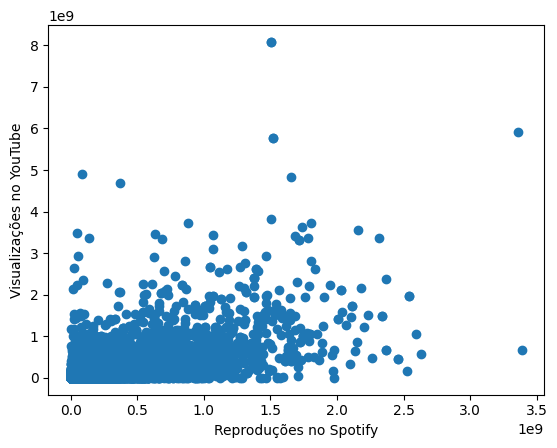

In [7]:
# Cria um gráfico de dispersão com o número de reproduções no Spotify e visualizações no YouTube
plt.scatter(df['Stream'], df['Views'])
plt.xlabel('Reproduções no Spotify')
plt.ylabel('Visualizações no YouTube')
plt.show()

In [8]:
# Ordena o DataFrame em ordem decrescente de reproduções no Spotify e pega as 10 primeiras linhas
top_spotify = df.sort_values('Stream', ascending=False).head(10)

# Ordena o DataFrame em ordem decrescente de visualizações no YouTube e pega as 10 primeiras linhas
top_youtube = df.sort_values('Views', ascending=False).head(10)


In [9]:
#Top 10 músicas mais populares no Spotify:
top_spotify

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,official_video,Stream
15250,The Weeknd,Blinding Lights,After Hours,album,0.514,0.730,1.0,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040.0,The Weeknd - Blinding Lights (Official Video),TheWeekndVEVO,6.741645e+08,8817927.0,282589.0,True,3.386520e+09
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5.908398e+09,31047780.0,1130327.0,True,3.362005e+09
19186,Lewis Capaldi,Someone You Loved,Divinely Uninspired To A Hellish Extent,album,0.501,0.405,1.0,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,182161.0,Lewis Capaldi - Someone You Loved,LewisCapaldiVEVO,5.867684e+08,7367091.0,147565.0,True,2.634013e+09
17937,Post Malone,rockstar (feat. 21 Savage),beerbongs & bentleys,album,0.585,0.520,5.0,-6.136,0.0712,0.12400,0.000070,0.1310,0.129,159.801,218147.0,Post Malone ft. 21 Savage - rockstar (Official Music Video),PostMaloneVEVO,1.060220e+09,12564657.0,366520.0,True,2.594927e+09
17938,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,album,0.755,0.522,2.0,-4.368,0.0575,0.53300,0.000000,0.0685,0.925,89.960,157560.0,"Post Malone, Swae Lee - Sunflower (Spider-Man: Into the Spider-Verse)",PostMaloneVEVO,1.977389e+09,13749813.0,331063.0,True,2.538330e+09
17445,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,album,0.755,0.522,2.0,-4.368,0.0575,0.53300,0.000000,0.0685,0.925,89.960,157560.0,"Post Malone, Swae Lee - Sunflower (Spider-Man: Into the Spider-Verse)",PostMaloneVEVO,1.977389e+09,13749806.0,331064.0,True,2.538330e+09
13503,Drake,One Dance,Views,album,0.792,0.625,1.0,-5.609,0.0536,0.00776,0.001800,0.3290,0.370,103.967,173987.0,Drake - One Dance (Lyrics) ft. Wizkid & Kyla,Billion Stars,1.692883e+08,1662640.0,13775.0,False,2.522432e+09
16099,The Chainsmokers,Closer,Closer,single,0.748,0.524,8.0,-5.599,0.0338,0.41400,0.000000,0.1110,0.661,95.010,244960.0,The Chainsmokers - Closer (Official Video) ft. Halsey,ChainsmokersVEVO,4.559145e+08,3423268.0,93021.0,True,2.456205e+09
16028,Halsey,Closer,Closer,single,0.748,0.524,8.0,-5.599,0.0338,0.41400,0.000000,0.1110,0.661,95.010,244960.0,The Chainsmokers - Closer (Official Video) ft. Halsey,ChainsmokersVEVO,4.559145e+08,3423268.0,93021.0,True,2.456205e+09
14030,Imagine Dragons,Believer,Evolve,album,0.776,0.780,10.0,-4.374,0.1280,0.06220,0.000000,0.0810,0.666,124.949,204347.0,Imagine Dragons - Believer (Official Music Video),ImagineDragonsVEVO,2.369715e+09,20483444.0,613230.0,True,2.369272e+09


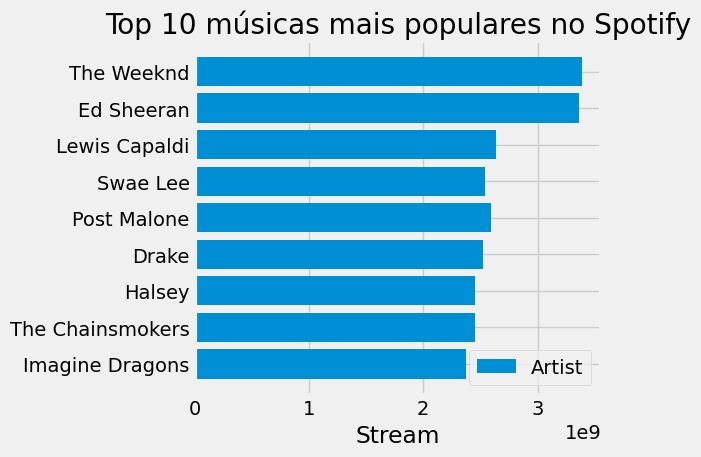

In [10]:
top_spotify.sort_values('Stream', ascending=True, inplace=True)
plt.style.use("fivethirtyeight")
plt.barh(top_spotify['Artist'], top_spotify['Stream'], label="Artist" )

plt.legend()
plt.title("Top 10 músicas mais populares no Spotify")
plt.xlabel("Stream")
plt.tight_layout()
plt.show()

In [11]:
#Top 10 músicas mais populares no YouTube
top_youtube

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,official_video,Stream
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.19800,0.000000,0.0670,0.839,177.928,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,True,1.506598e+09
365,Daddy Yankee,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.19800,0.000000,0.0670,0.839,177.928,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,True,1.506598e+09
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,233713.0,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5.908398e+09,31047780.0,1130327.0,True,3.362005e+09
14580,Charlie Puth,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.36900,0.000001,0.0649,0.283,80.025,229526.0,Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack,Wiz Khalifa Music,5.773798e+09,40147674.0,2127346.0,True,1.521255e+09
12469,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,0.36900,0.000001,0.0649,0.283,80.025,229526.0,Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack,Wiz Khalifa Music,5.773797e+09,40147618.0,2127345.0,True,1.521255e+09
20303,CoComelon,Wheels on the Bus,"CoComelon Kids Hits, Vol. 1",album,0.941,0.387,9.0,-11.920,0.0427,0.18400,0.000029,0.1570,0.965,125.021,207340.0,Wheels on the Bus | CoComelon Nursery Rhymes & Kids Songs,Cocomelon - Nursery Rhymes,4.898831e+09,14396841.0,0.0,True,8.343436e+07
10686,Mark Ronson,Uptown Funk (feat. Bruno Mars),Uptown Special,album,0.856,0.609,0.0,-7.223,0.0824,0.00801,0.000082,0.0344,0.928,114.988,269667.0,Mark Ronson - Uptown Funk (Official Video) ft. Bruno Mars,MarkRonsonVEVO,4.821016e+09,20067879.0,598916.0,True,1.653820e+09
8937,PSY,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,0.727,0.937,11.0,-2.871,0.2860,0.00417,0.000000,0.0910,0.749,132.067,219493.0,PSY - GANGNAM STYLE(강남스타일) M/V,officialpsy,4.679767e+09,26399133.0,5331537.0,False,3.709911e+08
9569,Maroon 5,Sugar,V,album,0.748,0.788,1.0,-7.055,0.0334,0.05910,0.000000,0.0863,0.884,120.076,235493.0,Maroon 5 - Sugar (Official Music Video),Maroon5VEVO,3.817733e+09,15340646.0,415496.0,True,1.502781e+09
13032,Katy Perry,Roar,PRISM,album,0.671,0.771,7.0,-4.821,0.0316,0.00492,0.000007,0.3540,0.436,90.003,223546.0,Katy Perry - Roar (Official),KatyPerryVEVO,3.725749e+09,15864499.0,763366.0,True,8.847210e+08


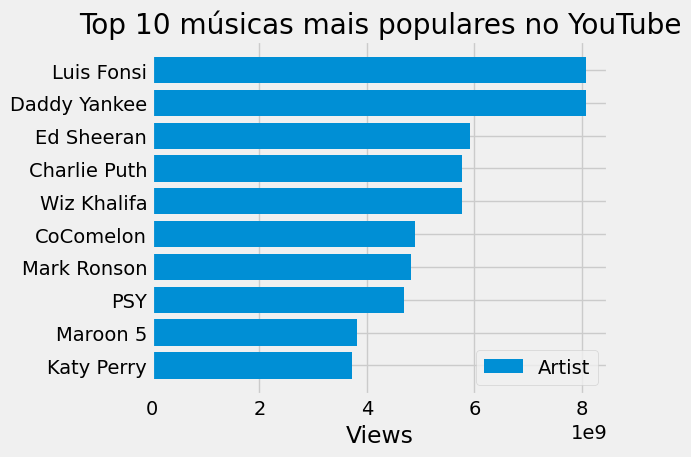

In [12]:
top_youtube.sort_values('Views', ascending=True, inplace=True)
plt.style.use("fivethirtyeight")
plt.barh(top_youtube['Artist'], top_youtube['Views'], label="Artist" )

plt.legend()
plt.title("Top 10 músicas mais populares no YouTube")
plt.xlabel("Views")
plt.tight_layout()
plt.show()

Para ver o desempenho de um artista específico em ambas as plataformas, podemos filtrar o DataFrame usando a coluna **_Artist_** e criar um gráfico de linha mostrando o número de reproduções no Spotify e visualizações no YouTube ao longo do tempo. O código para criar esse gráfico é mostrado abaixo:

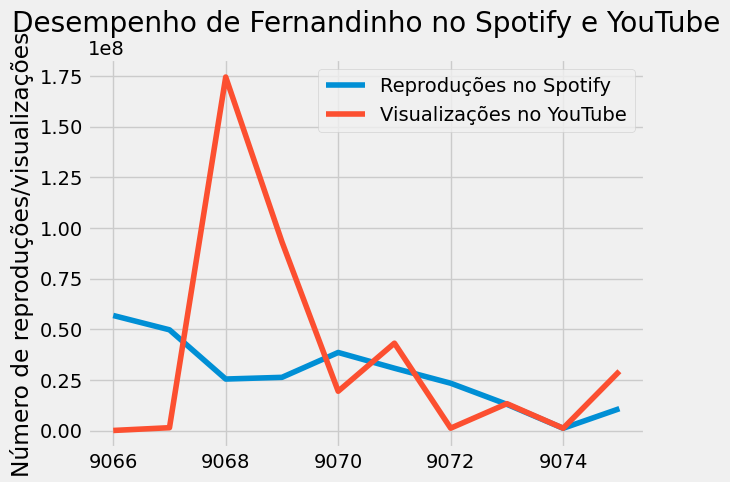

In [13]:
# Filtra o DataFrame para incluir apenas as músicas do artista escolhido
artista = 'Fernandinho'
df_artista = df[df['Artist'] == artista]

# Cria um gráfico de linha com o número de reproduções no Spotify e visualizações no YouTube ao longo do tempo
plt.plot( df_artista['Stream'], label='Reproduções no Spotify')
plt.plot(df_artista['Views'], label='Visualizações no YouTube')
plt.ylabel('Número de reproduções/visualizações')
plt.title(f'Desempenho de {artista} no Spotify e YouTube')
plt.legend()
plt.show()

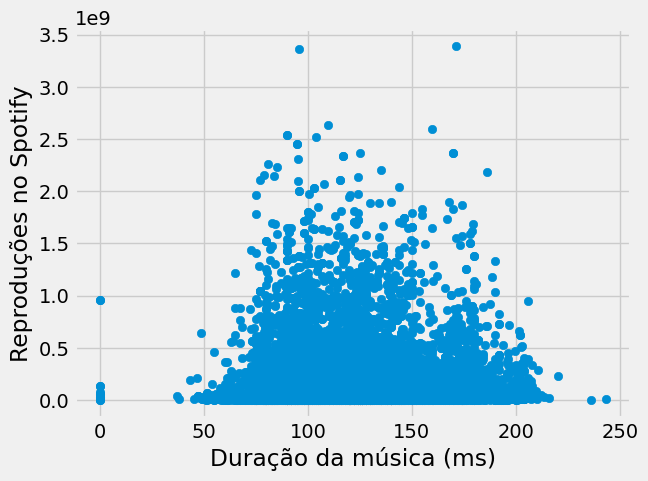

In [14]:
# Cria um gráfico de dispersão com a duração da música e o número de reproduções no Spotify
plt.scatter(df['Tempo'], df['Stream'])
plt.xlabel('Duração da música (ms)')
plt.ylabel('Reproduções no Spotify')
plt.show()

In [15]:
# Agrupa o DataFrame por notas musicais e conta o número de ocorrências de cada nota
key_count = df.groupby('Key')['Artist'].count()


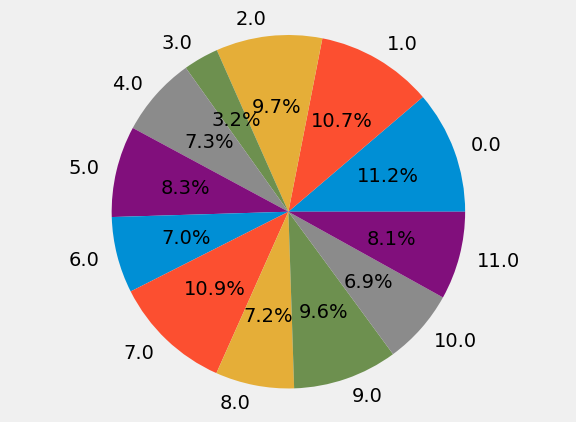

In [16]:
# Cria um gráfico de pizza com a distribuição por gênero musical
plt.pie(key_count, labels=key_count.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()